In [ ]:
!apt-get install openssh-client

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openssh-client is already the newest version (1:8.9p1-3ubuntu0.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!ssh -o StrictHostKeyChecking=no D23125838@147.252.6.50


^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#### COLAB GAN
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Generator
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn. ()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')
        if self.transform:
            image = self.transform(image)
        return image

# Function to get image paths from folders
def get_image_paths(folder):
    image_paths = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

#
folder = "/content/drive/My Drive/Mild Dementia"
image_paths = get_image_paths(folder)

In [ ]:
import os

folder = "/content/drive/My Drive/Mild Dementia"
if os.path.exists(folder):
    print(f"Folder exists: {folder}")
    print("Contents of the folder:")
    print(os.listdir(folder))
else:
    print(f"Folder does not exist: {folder}")


Folder exists: /content/drive/My Drive/Mild Dementia
Contents of the folder:
['OAS1_0278_MR1_mpr-4_118.jpg', 'OAS1_0278_MR1_mpr-4_105.jpg', 'OAS1_0278_MR1_mpr-4_107.jpg', 'OAS1_0278_MR1_mpr-4_125.jpg', 'OAS1_0278_MR1_mpr-4_133.jpg', 'OAS1_0278_MR1_mpr-4_135.jpg', 'OAS1_0278_MR1_mpr-4_134.jpg', 'OAS1_0278_MR1_mpr-4_126.jpg', 'OAS1_0278_MR1_mpr-4_108.jpg', 'OAS1_0278_MR1_mpr-4_145.jpg', 'OAS1_0291_MR1_mpr-1_110.jpg', 'OAS1_0291_MR1_mpr-1_100.jpg', 'OAS1_0291_MR1_mpr-1_125.jpg', 'OAS1_0291_MR1_mpr-1_128.jpg', 'OAS1_0278_MR1_mpr-4_152.jpg', 'OAS1_0278_MR1_mpr-4_160.jpg', 'OAS1_0291_MR1_mpr-1_113.jpg', 'OAS1_0278_MR1_mpr-4_157.jpg', 'OAS1_0278_MR1_mpr-4_149.jpg', 'OAS1_0291_MR1_mpr-1_114.jpg', 'OAS1_0291_MR1_mpr-1_109.jpg', 'OAS1_0291_MR1_mpr-1_111.jpg', 'OAS1_0278_MR1_mpr-4_154.jpg', 'OAS1_0291_MR1_mpr-1_124.jpg', 'OAS1_0291_MR1_mpr-1_123.jpg', 'OAS1_0278_MR1_mpr-4_150.jpg', 'OAS1_0278_MR1_mpr-4_156.jpg', 'OAS1_0291_MR1_mpr-1_119.jpg', 'OAS1_0278_MR1_mpr-4_148.jpg', 'OAS1_0291_MR1_mpr-1_10

In [ ]:

if not image_paths:
    print(f"No images found in folder: {folder}")
else:
    print(f"Found {len(image_paths)} images in folder: {folder}")

Found 4996 images in folder: /content/drive/My Drive/Mild Dementia


In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Create dataset and dataloader
dataset = CustomDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

# Initialize models
nz = 100  # Size of z latent vector
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
    # Training loop
    # Training loop
num_epochs = 50  #
target_images = 10000
images_saved = 0
os.makedirs('/content/drive/My Drive/synthetic_images_mild', exist_ok=True)

for epoch in range(num_epochs):
        for i, data in enumerate(dataloader, 0):
            # Train Discriminator
            netD.zero_grad()
            real_data = data.to(device)
            b_size = real_data.size(0)
            label = torch.full((b_size,), 1, device=device, dtype=torch.float)
            output = netD(real_data).view(-1)
            errD_real = criterion(output, label)
            errD_real.backward()
            D_x = output.mean().item()

            noise = torch.randn(b_size, nz, 1, 1, device=device)
            fake_data = netG(noise)
            label.fill_(0)
            output = netD(fake_data.detach()).view(-1)
            errD_fake = criterion(output, label)
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            errD = errD_real + errD_fake
            optimizerD.step()

            # Train Generator
            netG.zero_grad()
            label.fill_(1)
            output = netD(fake_data).view(-1)
            errG = criterion(output, label)
            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Print stats and save models
            if i % 50 == 0:
                print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}] Loss_D: {errD.item()} Loss_G: {errG.item()} D(x): {D_x} D(G(z)): {D_G_z1} / {D_G_z2}')

            # Save the generated images
            if images_saved < target_images:
                for j in range(fake_data.size(0)):
                    if images_saved >= target_images:
                        break
                    vutils.save_image(fake_data[j], f'/content/drive/My Drive/synthetic_images_mild/fake_image_{images_saved}.png', normalize=True)
                    images_saved += 1

            if images_saved >= target_images:
                print(f"Generated {target_images} images. Stopping training.")
                break

        if images_saved >= target_images:
            break


In [ ]:
    # Save the model checkpoints (optional)
    torch.save(netG.state_dict(), f'/content/drive/My Drive/synthetic_images_mild/netG_epoch_{epoch}.pth')
    torch.save(netD.state_dict(), f'/content/drive/My Drive/synthetic_images_mild/netD_epoch_{epoch}.pth')

## **MODERATE DEMENTIA**

In [ ]:
# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')
        if self.transform:
            image = self.transform(image)
        return image

# Function to get image paths from folders
def get_image_paths(folder):
    image_paths = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

#
folder = "/content/drive/My Drive/Moderate Dementia"
image_paths = get_image_paths(folder)

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Create dataset and dataloader
dataset = CustomDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

# Initialize models
nz = 100  # Size of z latent vector
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import os

folder = "/content/drive/My Drive/Moderate Dementia"
if os.path.exists(folder):
    print(f"Folder exists: {folder}")
    print("Contents of the folder:")
    print(os.listdir(folder))
else:
    print(f"Folder does not exist: {folder}")

Folder exists: /content/drive/My Drive/Moderate Dementia
Contents of the folder:
['OAS1_0308_MR1_mpr-1_109.jpg', 'OAS1_0308_MR1_mpr-1_106.jpg', 'OAS1_0308_MR1_mpr-1_103.jpg', 'OAS1_0308_MR1_mpr-1_108.jpg', 'OAS1_0308_MR1_mpr-1_105.jpg', 'OAS1_0308_MR1_mpr-1_110.jpg', 'OAS1_0308_MR1_mpr-1_104.jpg', 'OAS1_0308_MR1_mpr-1_102.jpg', 'OAS1_0308_MR1_mpr-1_107.jpg', 'OAS1_0308_MR1_mpr-1_100.jpg', 'OAS1_0308_MR1_mpr-1_111.jpg', 'OAS1_0308_MR1_mpr-1_101.jpg', 'OAS1_0308_MR1_mpr-1_126.jpg', 'OAS1_0308_MR1_mpr-1_139.jpg', 'OAS1_0308_MR1_mpr-1_131.jpg', 'OAS1_0308_MR1_mpr-1_150.jpg', 'OAS1_0308_MR1_mpr-1_152.jpg', 'OAS1_0308_MR1_mpr-1_153.jpg', 'OAS1_0308_MR1_mpr-1_154.jpg', 'OAS1_0308_MR1_mpr-1_114.jpg', 'OAS1_0308_MR1_mpr-1_146.jpg', 'OAS1_0308_MR1_mpr-1_124.jpg', 'OAS1_0308_MR1_mpr-1_127.jpg', 'OAS1_0308_MR1_mpr-1_129.jpg', 'OAS1_0308_MR1_mpr-1_119.jpg', 'OAS1_0308_MR1_mpr-1_122.jpg', 'OAS1_0308_MR1_mpr-1_128.jpg', 'OAS1_0308_MR1_mpr-1_133.jpg', 'OAS1_0308_MR1_mpr-1_138.jpg', 'OAS1_0308_MR1_mpr-

In [ ]:
    # Training loop
    num_epochs = 50
    target_images = 10000
    images_saved = 0
    os.makedirs('/content/drive/My Drive/synthetic_images_moderate', exist_ok=True)

    for epoch in range(num_epochs):
        for i, data in enumerate(dataloader, 0):
            # Train Discriminator
            netD.zero_grad()
            real_data = data.to(device)
            b_size = real_data.size(0)
            label = torch.full((b_size,), 1, device=device, dtype=torch.float)
            output = netD(real_data).view(-1)
            errD_real = criterion(output, label)
            errD_real.backward()
            D_x = output.mean().item()

            noise = torch.randn(b_size, nz, 1, 1, device=device)
            fake_data = netG(noise)
            label.fill_(0)
            output = netD(fake_data.detach()).view(-1)
            errD_fake = criterion(output, label)
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            errD = errD_real + errD_fake
            optimizerD.step()

            # Train Generator
            netG.zero_grad()
            label.fill_(1)
            output = netD(fake_data).view(-1)
            errG = criterion(output, label)
            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Print stats and save models
            if i % 50 == 0:
                print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}] Loss_D: {errD.item()} Loss_G: {errG.item()} D(x): {D_x} D(G(z)): {D_G_z1} / {D_G_z2}')

            # Save the generated images
            if images_saved < target_images:
                for j in range(fake_data.size(0)):
                    if images_saved >= target_images:
                        break
                    vutils.save_image(fake_data[j], f'/content/drive/My Drive/synthetic_images_moderate/fake_image_{images_saved}.png', normalize=True)
                    images_saved += 1

            if images_saved >= target_images:
                print(f"Generated {target_images} images. Stopping training.")
                break

        if images_saved >= target_images:
            break

[0/50][0/16] Loss_D: 0.2668553292751312 Loss_G: 5.246809959411621 D(x): 0.8132755756378174 D(G(z)): 0.03675270825624466 / 0.005964310839772224
[1/50][0/16] Loss_D: 0.36420050263404846 Loss_G: 6.215208053588867 D(x): 0.951595664024353 D(G(z)): 0.25944846868515015 / 0.0022333639208227396
[2/50][0/16] Loss_D: 0.1609715074300766 Loss_G: 4.078522205352783 D(x): 0.9618645906448364 D(G(z)): 0.11104980111122131 / 0.02109808474779129
[3/50][0/16] Loss_D: 0.33638495206832886 Loss_G: 5.897046089172363 D(x): 0.8881393671035767 D(G(z)): 0.18021254241466522 / 0.003844535443931818
[4/50][0/16] Loss_D: 0.46855297684669495 Loss_G: 8.001472473144531 D(x): 0.9722305536270142 D(G(z)): 0.3391374945640564 / 0.0004299908468965441
[5/50][0/16] Loss_D: 0.8600590825080872 Loss_G: 8.014185905456543 D(x): 0.9398925304412842 D(G(z)): 0.45879653096199036 / 0.0008704941719770432
[6/50][0/16] Loss_D: 0.25297093391418457 Loss_G: 3.3772449493408203 D(x): 0.8744648694992065 D(G(z)): 0.10069389641284943 / 0.0462563633918

In [ ]:
    # Save the model checkpoints (optional)
    torch.save(netG.state_dict(), f'/content/drive/My Drive/synthetic_images_Moderate/netG_epoch_{epoch}.pth')
    torch.save(netD.state_dict(), f'/content/drive/My Drive/synthetic_images_Moderate/netD_epoch_{epoch}.pth')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image
import glob
from sklearn.utils import resample
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path_non_demented = '/content/drive/MyDrive/Non Demented'
path_very_mild_dementia = '/content/drive/MyDrive/Very mild Dementia'
path_mild_dementia = '/content/drive/MyDrive/synthetic_images_mild'
path_moderate_dementia = '/content/drive/MyDrive/synthetic_images_moderate'

In [ ]:

# Function to verify directory contents
def verify_directory_contents(folder_path):
    try:
        if os.path.exists(folder_path):
            print(f"Contents of {folder_path}: {os.listdir(folder_path)}")
        else:
            print(f"Directory {folder_path} does not exist.")
    except Exception as e:
        print(f"Error accessing {folder_path}: {e}")

verify_directory_contents(path_non_demented)
verify_directory_contents(path_very_mild_dementia)
verify_directory_contents(path_mild_dementia)
verify_directory_contents(path_moderate_dementia)

Contents of /content/drive/MyDrive/Non Demented: ['OAS1_0377_MR1_mpr-4_139.jpg', 'OAS1_0377_MR1_mpr-4_140.jpg', 'OAS1_0378_MR1_mpr-1_101.jpg', 'OAS1_0377_MR1_mpr-4_146.jpg', 'OAS1_0377_MR1_mpr-4_151.jpg', 'OAS1_0377_MR1_mpr-4_153.jpg', 'OAS1_0377_MR1_mpr-4_147.jpg', 'OAS1_0378_MR1_mpr-1_100.jpg', 'OAS1_0377_MR1_mpr-4_132.jpg', 'OAS1_0377_MR1_mpr-4_129.jpg', 'OAS1_0377_MR1_mpr-4_124.jpg', 'OAS1_0377_MR1_mpr-4_150.jpg', 'OAS1_0377_MR1_mpr-4_136.jpg', 'OAS1_0377_MR1_mpr-4_128.jpg', 'OAS1_0377_MR1_mpr-4_137.jpg', 'OAS1_0377_MR1_mpr-4_152.jpg', 'OAS1_0377_MR1_mpr-4_154.jpg', 'OAS1_0377_MR1_mpr-4_145.jpg', 'OAS1_0377_MR1_mpr-4_127.jpg', 'OAS1_0377_MR1_mpr-4_148.jpg', 'OAS1_0377_MR1_mpr-4_138.jpg', 'OAS1_0377_MR1_mpr-4_157.jpg', 'OAS1_0377_MR1_mpr-4_143.jpg', 'OAS1_0377_MR1_mpr-4_134.jpg', 'OAS1_0377_MR1_mpr-4_155.jpg', 'OAS1_0377_MR1_mpr-4_149.jpg', 'OAS1_0378_MR1_mpr-1_125.jpg', 'OAS1_0378_MR1_mpr-1_115.jpg', 'OAS1_0378_MR1_mpr-1_141.jpg', 'OAS1_0378_MR1_mpr-1_135.jpg', 'OAS1_0378_MR1_mpr-1

In [ ]:
def load_image_paths(folder_path):
    extensions = ['*.jpg', '*.jpeg', '*.png']
    image_paths = []
    for ext in extensions:
        image_paths.extend(glob.glob(os.path.join(folder_path, ext)))
    return image_paths

non_demented_images = load_image_paths(path_non_demented)
very_mild_dementia_images = load_image_paths(path_very_mild_dementia)
mild_dementia_images = load_image_paths(path_mild_dementia)
moderate_dementia_images = load_image_paths(path_moderate_dementia)


In [ ]:
print(f"Non Demented images found: {len(non_demented_images)}")
print(f"Very mild Dementia images found: {len(very_mild_dementia_images)}")
print(f"Mild Dementia images found: {len(mild_dementia_images)}")
print(f"Moderate Dementia images found: {len(moderate_dementia_images)}")

Non Demented images found: 67230
Very mild Dementia images found: 13725
Mild Dementia images found: 10000
Moderate Dementia images found: 10000


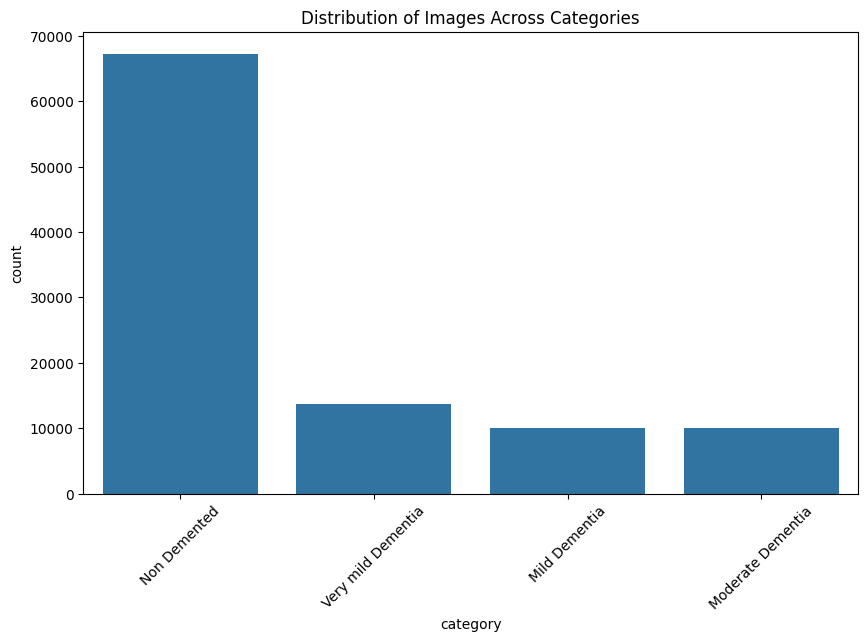

In [ ]:
import pandas as pd
data = {
    'category': ['Non Demented'] * len(non_demented_images) +
                ['Very mild Dementia'] * len(very_mild_dementia_images) +
                ['Mild Dementia'] * len(mild_dementia_images) +
                ['Moderate Dementia'] * len(moderate_dementia_images),
    'image_path': non_demented_images + very_mild_dementia_images + mild_dementia_images + moderate_dementia_images
}
df = pd.DataFrame(data)

# Plot the distribution of images across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Distribution of Images Across Categories')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Function to check for missing or corrupted images
def is_image_valid(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None or img.size == 0:
            return False
        return True
    except:
        return False

df['is_valid'] = df['image_path'].apply(is_image_valid)
invalid_images = df[~df['is_valid']]
print(f"Number of invalid images: {len(invalid_images)}")

Number of invalid images: 100955


In [ ]:
if len(non_demented_images) >= 10000:
    non_demented_sampled = resample(non_demented_images,
                                    replace=False,    # sample without replacement
                                    n_samples=10000,  # number of samples
                                    random_state=42)  # reproducible results
else:
    non_demented_sampled = non_demented_images

In [ ]:
if len(very_mild_dementia_images) >= 10000:
    very_mild_dementia_sampled = resample(very_mild_dementia_images,
                                          replace=False,    # sample without replacement
                                          n_samples=10000,  # number of samples
                                          random_state=42)  # reproducible results
else:
    very_mild_dementia_sampled = very_mild_dementia_images

In [ ]:
mild_dementia_sampled = mild_dementia_images
moderate_dementia_sampled = moderate_dementia_images

In [ ]:
def save_images(image_paths, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    for img_path in image_paths:
        try:
            shutil.copy(img_path, target_folder)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            # Create an error image
            error_img = Image.new('RGB', (500, 200), color = (73, 73, 73))
            d = ImageDraw.Draw(error_img)
            d.text((10, 90), "There was an error processing this image.", fill=(255,255,255))
            error_img_path = os.path.join(target_folder, os.path.basename(img_path))
            error_img.save(error_img_path)

target_folder_non_demented = '/content/drive/MyDrive/Resampled/Non Demented'
target_folder_very_mild_dementia = '/content/drive/MyDrive/Resampled/Very mild Dementia'
target_folder_mild_dementia = '/content/drive/MyDrive/Resampled/Mild Dementia'
target_folder_moderate_dementia = '/content/drive/MyDrive/Resampled/Moderate Dementia'

save_images(non_demented_sampled, target_folder_non_demented)
save_images(very_mild_dementia_sampled, target_folder_very_mild_dementia)
save_images(mild_dementia_sampled, target_folder_mild_dementia)
save_images(moderate_dementia_sampled, target_folder_moderate_dementia)

In [ ]:
import os
from PIL import Image

# Define paths to the folders
folders = {
    'Non Demented': '/content/drive/MyDrive/Resampled/Non Demented',
    'Very mild Dementia': '/content/drive/MyDrive/Resampled/Very mild Dementia'
}

# Resize images to 64x64 pixels
def resize_images(folder_path, size=(64, 64)):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        with Image.open(img_path) as img:
            img = img.resize(size, Image.ANTIALIAS)
            img.save(img_path)

for folder_name, folder_path in folders.items():
    resize_images(folder_path)
    print(f"Resized images in {folder_name}")


<ipython-input-2-aae5c194f9e1>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


Resized images in Non Demented
Resized images in Very mild Dementia


In [ ]:
import os
from PIL import Image

# Define paths to the folders
folders = {
    'Non Demented': '/content/drive/MyDrive/Mild Dementia',
    'Very mild Dementia': '/content/drive/MyDrive/Moderate Dementia'
}

# Resize images to 64x64 pixels
def resize_images(folder_path, size=(64, 64)):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        with Image.open(img_path) as img:
            img = img.resize(size, Image.ANTIALIAS)
            img.save(img_path)

for folder_name, folder_path in folders.items():
    resize_images(folder_path)
    print(f"Resized images in {folder_name}")


<ipython-input-3-64f8b3be009b>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


Resized images in Non Demented
Resized images in Very mild Dementia


In [ ]:
import os
import shutil

# Define the paths
original_images_path = '/content/drive/MyDrive/Mild Dementia'
fake_images_path = '/content/drive/MyDrive/Resampled/Mild Dementia'

# Get a list of all files in the original images directory
original_images = os.listdir(original_images_path)

# Copy each file from the original images directory to the fake images directory
for filename in original_images:
    src = os.path.join(original_images_path, filename)
    dst = os.path.join(fake_images_path, filename)

    # Check if the destination file already exists to avoid overwriting
    if os.path.exists(dst):
        print(f"File {filename} already exists in the destination folder. Skipping...")
    else:
        shutil.copy2(src, dst)  # copy2 preserves metadata
        print(f"Copied {filename} to {fake_images_path}")

print("All files copied successfully!")


Copied OAS1_0278_MR1_mpr-4_118.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_105.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_107.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_125.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_133.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_135.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_134.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_126.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_108.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0278_MR1_mpr-4_145.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0291_MR1_mpr-1_110.jpg to /content/drive/MyDrive/Resampled/Mild Dementia
Copied OAS1_0291_MR1_mpr-1_100.jpg to /content/drive/MyDrive/Resa

In [ ]:
import os
import shutil

# Define the paths
original_images_path = '/content/drive/MyDrive/Moderate Dementia'
fake_images_path = '/content/drive/MyDrive/Resampled/Moderate Dementia'

# Get a list of all files in the original images directory
original_images = os.listdir(original_images_path)

# Copy each file from the original images directory to the fake images directory
for filename in original_images:
    src = os.path.join(original_images_path, filename)
    dst = os.path.join(fake_images_path, filename)

print("All files copied successfully!")


All files copied successfully!


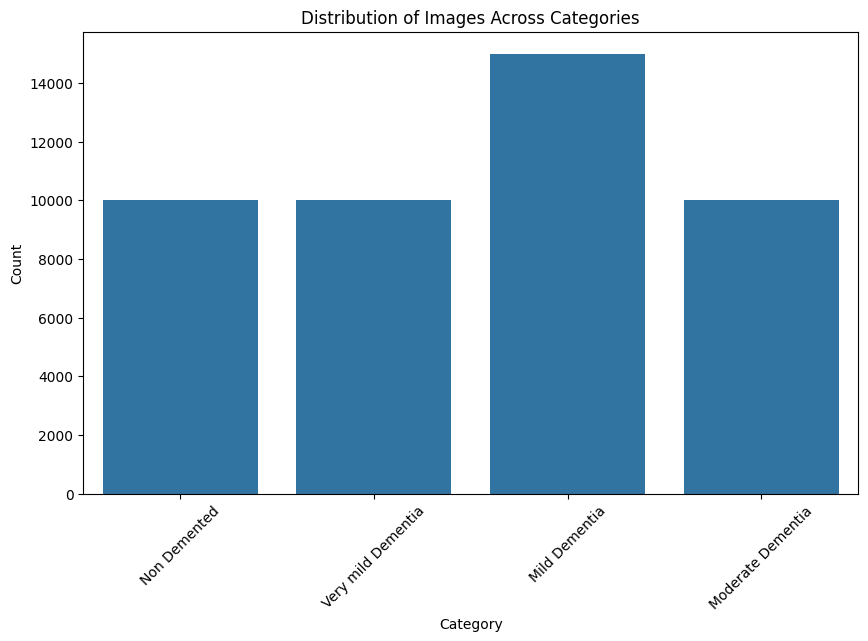

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the main directory
main_dir = '/content/drive/MyDrive/Resampled'

# Initialize a dictionary to hold the count of images per category
image_count = {}

# Loop through each folder in the main directory
for category in os.listdir(main_dir):
    category_path = os.path.join(main_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        count = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
        image_count[category] = count

# Convert the dictionary to a list of tuples for plotting
categories = list(image_count.keys())
counts = list(image_count.values())

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Images Across Categories')
plt.show()
